In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df_subway = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/지하철이용 인원 변화분석/서울시_지하철_인원 정보.csv", encoding="cp949")
df_subway.head(3)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202107,1호선,동대문,665,13,13154,2112,8755,6552,13558,...,7234,7,1394,0,0,0,1,0,0,20210803
1,202107,1호선,동묘앞,92,0,3197,1077,3575,4910,5452,...,1955,3,1039,0,0,0,0,0,0,20210803
2,202107,1호선,서울역,654,6,8652,6342,11542,33836,34033,...,5824,29,551,0,0,0,0,0,0,20210803


In [10]:
df_subway.shape

(45945, 52)

In [11]:
df = df_subway.melt(id_vars=["사용월", "호선명", "지하철역"], var_name="시간", value_name="인원수")

In [12]:
df["시간"].unique()

array(['04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원', '05시-06시 하차인원',
       '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원', '07시-08시 하차인원',
       '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원', '09시-10시 하차인원',
       '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원', '11시-12시 하차인원',
       '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원', '13시-14시 하차인원',
       '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원', '15시-16시 하차인원',
       '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원', '17시-18시 하차인원',
       '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원', '19시-20시 하차인원',
       '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원', '21시-22시 하차인원',
       '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원', '23시-24시 하차인원',
       '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원', '01시-02시 하차인원',
       '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원', '03시-04시 하차인원',
       '작업일자'], dtype=object)

In [13]:
print(df.shape)
df = df[df["시간"] != "작업일자"]
print(df.shape)

(2251305, 5)
(2205360, 5)


In [14]:
str_time = df["시간"].str.split(" ", expand=True)

In [15]:
df["시간대"] = str_time[0]
df["승하차"] = str_time[1]

In [16]:
df["승하차"] = df["승하차"].str.replace("인원", "")

In [17]:
df

,사용월,호선명,지하철역,시간,인원수,시간대,승하차
0,202107,1호선,동대문,04시-05시 승차인원,665,04시-05시,승차
1,202107,1호선,동묘앞,04시-05시 승차인원,92,04시-05시,승차
2,202107,1호선,서울역,04시-05시 승차인원,654,04시-05시,승차
3,202107,1호선,시청,04시-05시 승차인원,13,04시-05시,승차
4,202107,1호선,신설동,04시-05시 승차인원,295,04시-05시,승차
...,...,...,...,...,...,...,...
2205355,201501,중앙선,운길산,03시-04시 하차인원,0,03시-04시,하차
2205356,201501,중앙선,원덕,03시-04시 하차인원,0,03시-04시,하차
2205357,201501,중앙선,중랑,03시-04시 하차인원,0,03시-04시,하차
2205358,201501,중앙선,팔당,03시-04시 하차인원,0,03시-04시,하차


In [18]:
df_month_count = df.groupby(["사용월", "호선명", "시간대","승하차"])["인원수"].sum().reset_index()
df_month_count

,사용월,호선명,시간대,승하차,인원수
0,201501,1호선,00시-01시,승차,20590
1,201501,1호선,00시-01시,하차,36716
2,201501,1호선,01시-02시,승차,17
3,201501,1호선,01시-02시,하차,885
4,201501,1호선,02시-03시,승차,2
...,...,...,...,...,...
92203,202107,중앙선,21시-22시,하차,104894
92204,202107,중앙선,22시-23시,승차,39562
92205,202107,중앙선,22시-23시,하차,108069
92206,202107,중앙선,23시-24시,승차,9355


In [19]:
df_month_count_19 = df_month_count[df_month_count["사용월"] > 201901]
df_month_count_19

,사용월,호선명,시간대,승하차,인원수
56208,201902,1호선,00시-01시,승차,14703
56209,201902,1호선,00시-01시,하차,28094
56210,201902,1호선,01시-02시,승차,437
56211,201902,1호선,01시-02시,하차,963
56212,201902,1호선,02시-03시,승차,1
...,...,...,...,...,...
92203,202107,중앙선,21시-22시,하차,104894
92204,202107,중앙선,22시-23시,승차,39562
92205,202107,중앙선,22시-23시,하차,108069
92206,202107,중앙선,23시-24시,승차,9355


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.

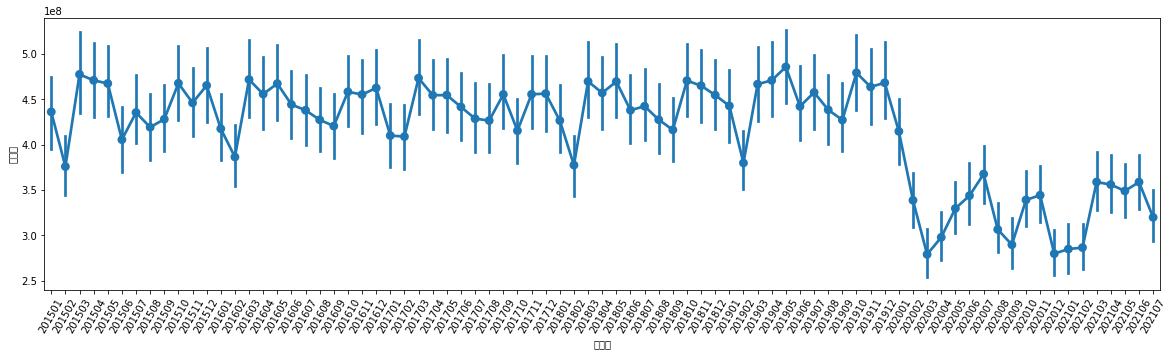

In [20]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=60)
sns.pointplot(data=df_month_count, x="사용월", y="인원수", estimator=np.sum)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text

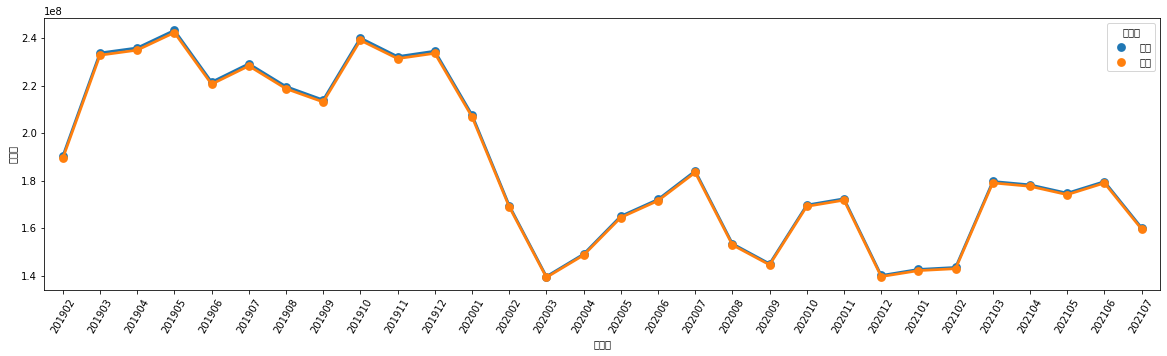

In [21]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=60)
sns.pointplot(data=df_month_count_19, x="사용월", y="인원수", 
              hue="승하차", ci=None, estimator=np.sum)

In [22]:
!git config --global user.email shin970421@gmail.com
!git config --global user.name Shin heejun

In [26]:
!echo "# Seoul_Subway_dataset_practice" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!!git branch -M main
!git remote add origin "https://github.com/Shj-A/Seoul_Subway_dataset_practice.git"
!git push -u origin main

Reinitialized existing Git repository in /content/.git/
[main 0b5e45e] first commit
 1 file changed, 1 insertion(+)
fatal: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address
